# Import libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# Replace the file ID in the URL below with your own file ID
import gdown
import pandas as pd

file_id = '1smcSd_9iHyPL7CiRakxmlm3QRiw-T-NB'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'your_dataset.csv', quiet=False)
import pandas as pd

# Load the CSV file into a DataFrame
train_df= pd.read_csv('your_dataset.csv')

# Display the first few rows to confirm the data is loaded
train_df.head()
# Use the file ID from your Google Drive URL
file_id = '1FjpO1ZUYQs4oKgI5DfTuLGVivvjUzrks'

# Download the file to the Colab environment
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'your_dataset.csv', quiet=False)
import pandas as pd

# Load the CSV file into a DataFrame
test_df = pd.read_csv('your_dataset.csv')

# Display the first few rows to confirm the data is loaded
test_df.head()

Mounted at /content/drive


Downloading...
From (original): https://drive.google.com/uc?id=1smcSd_9iHyPL7CiRakxmlm3QRiw-T-NB
From (redirected): https://drive.google.com/uc?id=1smcSd_9iHyPL7CiRakxmlm3QRiw-T-NB&confirm=t&uuid=71dc5c9c-32a6-4186-a650-5d15b55e64d6
To: /content/your_dataset.csv
100%|██████████| 412M/412M [00:06<00:00, 65.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FjpO1ZUYQs4oKgI5DfTuLGVivvjUzrks
To: /content/your_dataset.csv
100%|██████████| 103M/103M [00:02<00:00, 50.4MB/s] 


,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Reading&Exploring Data

In [3]:
train_df.describe()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
count,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,...,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000
mean,0.890359,0.758158,0.423969,0.219104,0.201127,0.210399,0.205809,0.201774,0.198693,0.196758,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473382
std,0.240910,0.221814,0.227305,0.206880,0.177058,0.171910,0.178482,0.177241,0.171778,0.168358,...,0.044155,0.042089,0.040525,0.038651,0.037193,0.036255,0.034790,0.032865,0.031924,1.143190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682482,0.250965,0.048458,0.082329,0.088415,0.073333,0.066116,0.065000,0.068643,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826007,0.429467,0.165992,0.147870,0.158798,0.145320,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287634,0.298246,0.295393,0.290837,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [4]:
train_df.isnull().sum().sum()

np.int64(0)

In [5]:
X = train_df.iloc[:, :-1].values
y = train_df.iloc[:, -1].values

In [6]:
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

In [7]:
#Label Encoding
label_enc2 = LabelEncoder()
y_test = label_enc2.fit_transform(y_test)
y_test

array([0, 0, 0, ..., 4, 4, 4])

In [8]:
#Printing X shape
X.shape

(87553, 187)

In [9]:
#Printing Y shape
y.shape

(87553,)

In [10]:
!pip install imbalanced-learn


# Over Sampling

In [11]:
from imblearn.over_sampling import RandomOverSampler

# X.shape = (87554, 187)
# y.shape = (87554,)

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print("X_resampled shape:", X_resampled.shape)  #(new_samples, 187)
print("y_resampled shape:", y_resampled.shape)


X_resampled shape: (362350, 187)
y_resampled shape: (362350,)


In [12]:
# (1) X Original Shape: (87554, 187)

from sklearn.preprocessing import StandardScaler
#Scale 0=>1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

#Reshaping for Conv 1D
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))  # ← (87554, 187, 1)


In [13]:
#Label Encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_resampled)
y_encoded

array([0, 0, 0, ..., 4, 4, 4])

In [14]:
from tensorflow.keras.utils import to_categorical

y_categorical = to_categorical(y_encoded)

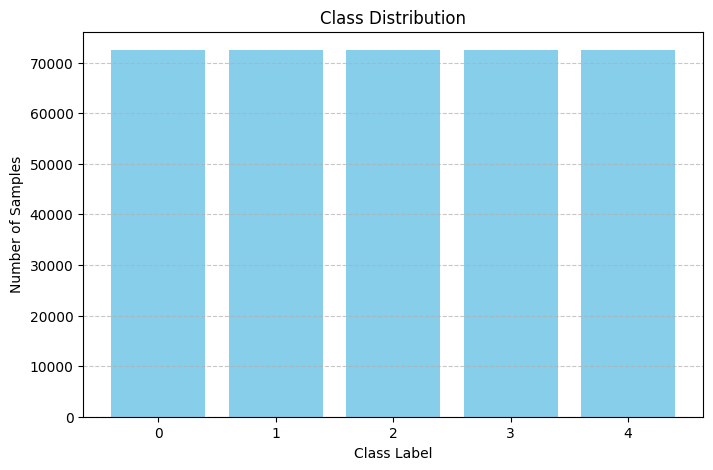

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Calculate number of samples in each class
label_counts = Counter(y_encoded)

labels = sorted(label_counts.keys())
counts = [label_counts[k] for k in labels]

# draw
plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color='skyblue')
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.xticks(labels)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 50 to 55k down sampling

In [16]:
import numpy as np

# get classes indexes
class_indices = {cls: np.where(y_encoded == cls)[0] for cls in np.unique(y_encoded)}

# number of dropping smaples
drop_config = {
    0: 50000,
    1: 55000,
    2: 55000,
    3: 55000,
    4: 55000,
}

np.random.seed(42)
drop_indices = []

for cls, n_to_drop in drop_config.items():
    indices = class_indices[cls]
    if len(indices) >= n_to_drop:
        dropped = np.random.choice(indices, size=n_to_drop, replace=False)
        drop_indices.extend(dropped)
    else:
        print(f"⚠️ الكلاس {cls} فيه بس {len(indices)} عينة، مش هنقدر نحذف {n_to_drop}.")

drop_indices = np.array(drop_indices)
keep_indices = np.setdiff1d(np.arange(len(y_encoded)), drop_indices)

# نحدث البيانات
X_scaled = X_scaled[keep_indices]            # ← 3D
y_encoded = y_encoded[keep_indices]          # ← 1D
y_categorical = y_categorical[keep_indices]  # ← one-hot


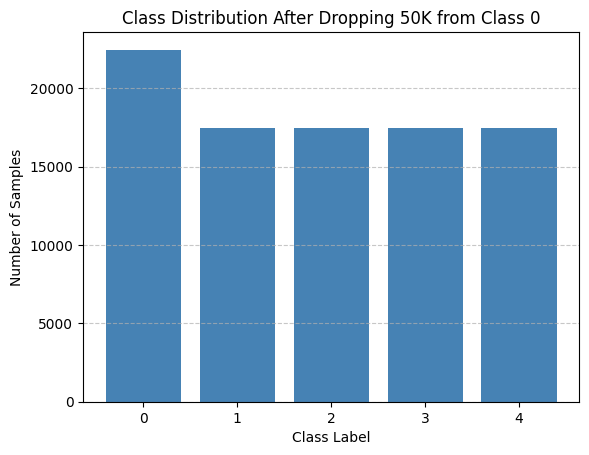

In [17]:
import matplotlib.pyplot as plt
from collections import Counter

counts = Counter(y_encoded)
labels = sorted(counts.keys())
plt.bar(labels, [counts[k] for k in labels], color='steelblue')
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Class Distribution After Dropping 50K from Class 0")
plt.xticks(labels)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# class weights

In [18]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# calc weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_encoded),
    y=y_encoded
)

# to dict
class_weights_dict = dict(zip(np.unique(y_encoded), class_weights))

print(class_weights_dict)


{np.int64(0): np.float64(0.8219848687138407), np.int64(1): np.float64(1.0572409845449342), np.int64(2): np.float64(1.0572409845449342), np.int64(3): np.float64(1.0572409845449342), np.int64(4): np.float64(1.0572409845449342)}


In [19]:
#Spliting
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)


In [20]:
print("Train:", X_train.shape, y_train.shape)
print("Valid:", X_val.shape, y_val.shape)
print("Test :", X_test.shape, y_test.shape)


Train: (59104, 187, 1) (59104,)
Valid: (14776, 187, 1) (14776,)
Test : (18470, 187, 1) (18470,)


In [21]:
#  (n_samples, 187, 1)
X_train = X_train.reshape(-1, 187, 1).astype('float32')
X_val   = X_val.reshape(-1, 187, 1).astype('float32')
X_test  = X_test.reshape(-1, 187, 1).astype('float32')


In [22]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# Block 1
model.add(Conv1D(64, kernel_size=5, activation='relu', input_shape=(187, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

# Block 2
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))



# Block3
model.add(Conv1D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))



# Block4
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))


# Block5
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))





# Flatten + Dense
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 183, 64)        │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 183, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 91, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 89, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 89, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 44, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 42, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 42, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 21, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 19, 128)        │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 19, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 9, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 7, 64)          │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 299,973 (1.14 MB)

 Trainable params: 298,693 (1.14 MB)

 Non-trainable params: 1,280 (5.00 KB)

# Callback

In [32]:
from keras.callbacks import ModelCheckpoint

# save best verison = highest loss
checkpoint = ModelCheckpoint(
    '1best_model.keras',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min'
)


In [24]:
#train
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[checkpoint],
    class_weight=class_weights_dict
)


Epoch 1/100
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8147 - loss: 0.5029
Epoch 1: val_loss improved from inf to 0.15311, saving model to best_model.keras
924/924 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8148 - loss: 0.5027 - val_accuracy: 0.9427 - val_loss: 0.1531
Epoch 2/100
913/924 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9450 - loss: 0.1539
Epoch 2: val_loss improved from 0.15311 to 0.10904, saving model to best_model.keras
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9451 - loss: 0.1538 - val_accuracy: 0.9593 - val_loss: 0.1090
Epoch 3/100
923/924 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9629 - loss: 0.1000
Epoch 3: val_loss improved from 0.10904 to 0.08320, saving model to best_model.keras
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9629 - loss: 0.1000 - val_accuracy: 0.9685 - val_loss: 0.0832
Epoch 4/100
921/924 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9726 - loss: 0.0771
Epoch 4: val_loss improved from 0.08320 to 0.068

In [25]:
#callback best version
from keras.models import load_model

best_model = load_model("best_model.keras")


In [26]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")


578/578 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9934 - loss: 0.0608
Test Accuracy: 0.9941, Test Loss: 0.0502


In [27]:
 # classification_report
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


578/578 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4494
           1       0.99      1.00      0.99      3494
           2       0.99      0.99      0.99      3494
           3       1.00      1.00      1.00      3494
           4       1.00      1.00      1.00      3494

    accuracy                           0.99     18470
   macro avg       0.99      0.99      0.99     18470
weighted avg       0.99      0.99      0.99     18470



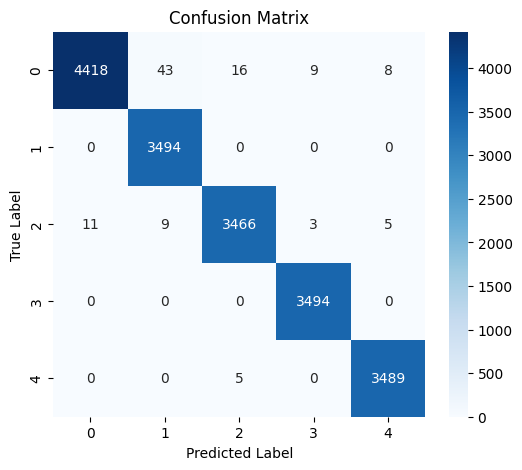

In [28]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[0, 1, 2, 3, 4],
            yticklabels=[0, 1, 2, 3, 4])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [29]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, BatchNormalization

# Initialize the model
model = Sequential()

# GRU Layer
model.add(GRU(64, input_shape=(187, 1), return_sequences=True))  # GRU layer with return_sequences=True for stacking GRU layers
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Second GRU Layer
model.add(GRU(128, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Third GRU Layer
model.add(GRU(256))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Dense layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(5, activation='softmax'))  # Change output units based on your classification problem

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summarize the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 187, 64)        │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 187, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 187, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 187, 128)       │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 187, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 187, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 256)            │       296,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 452,677 (1.73 MB)

 Trainable params: 451,781 (1.72 MB)

 Non-trainable params: 896 (3.50 KB)

In [33]:
from keras.callbacks import ModelCheckpoint

# save best verison = highest loss
checkpoint = ModelCheckpoint(
    '1best_model.keras',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min'
)


In [34]:
#train
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[checkpoint],
    class_weight=class_weights_dict
)


Epoch 1/100
923/924 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9327 - loss: 0.1865
Epoch 1: val_loss improved from inf to 0.19765, saving model to 1best_model.keras
924/924 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.9327 - loss: 0.1864 - val_accuracy: 0.9344 - val_loss: 0.1977
Epoch 2/100
923/924 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9418 - loss: 0.1639
Epoch 2: val_loss improved from 0.19765 to 0.17857, saving model to 1best_model.keras
924/924 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.9418 - loss: 0.1639 - val_accuracy: 0.9335 - val_loss: 0.1786
Epoch 3/100
923/924 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9523 - loss: 0.1333
Epoch 3: val_loss did not improve from 0.17857
924/924 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.9523 - loss: 0.1333 - val_accuracy: 0.9399 - val_loss: 0.1930
Epoch 4/100
923/924 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9559 - loss: 0.1259
Epoch 4: val_loss improved from 0.17857 to 0.09337, saving model to 1best_mo

In [37]:
 # classification_report
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


578/578 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      4494
           1       0.89      0.97      0.93      3494
           2       0.97      0.96      0.96      3494
           3       0.95      0.99      0.97      3494
           4       0.99      0.99      0.99      3494

    accuracy                           0.95     18470
   macro avg       0.95      0.96      0.95     18470
weighted avg       0.95      0.95      0.95     18470



In [35]:
#callback best version
from keras.models import load_model

best_model = load_model("1best_model.keras")


In [36]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")


578/578 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9496 - loss: 0.1454
Test Accuracy: 0.9529, Test Loss: 0.1398


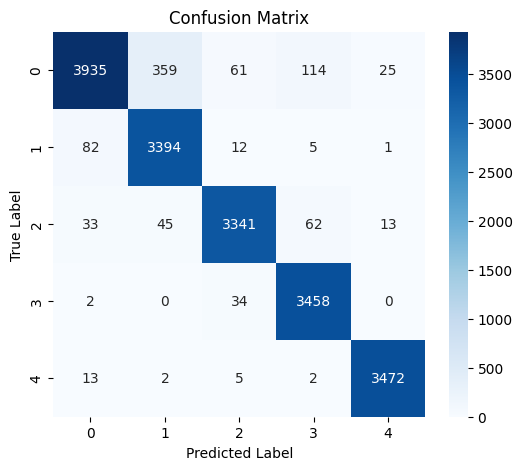

In [38]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[0, 1, 2, 3, 4],
            yticklabels=[0, 1, 2, 3, 4])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


TCN model

In [41]:
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D

model = Sequential()

# Block 1 - First TCN Block (Causal + Dilated Convolutions)
model.add(Conv1D(64, kernel_size=5, dilation_rate=1, padding='causal', activation='relu', input_shape=(187, 1)))
model.add(BatchNormalization())

# Block 2 - Second TCN Block (Causal + Dilated Convolutions)
model.add(Conv1D(128, kernel_size=3, dilation_rate=2, padding='causal', activation='relu'))
model.add(BatchNormalization())

# Block 3 - Third TCN Block (Causal + Dilated Convolutions)
model.add(Conv1D(256, kernel_size=3, dilation_rate=4, padding='causal', activation='relu'))
model.add(BatchNormalization())

# Block 4 - Fourth TCN Block (Causal + Dilated Convolutions)
model.add(Conv1D(128, kernel_size=3, dilation_rate=8, padding='causal', activation='relu'))
model.add(BatchNormalization())

# Block 5 - Fifth TCN Block (Causal + Dilated Convolutions)
model.add(Conv1D(64, kernel_size=3, dilation_rate=16, padding='causal', activation='relu'))
model.add(BatchNormalization())

# Global Average Pooling instead of Flatten
model.add(GlobalAveragePooling1D())

# Dense layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  # 5 classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)              │ (None, 187, 64)        │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 187, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 187, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 187, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 187, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 187, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 187, 128)       │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 187, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 187, 64)        │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 187, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,205 (1.02 MB)

 Trainable params: 265,925 (1.01 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [42]:
from keras.callbacks import ModelCheckpoint

# Save the best model based on validation loss
checkpoint = ModelCheckpoint(
    'best_model_tcn.keras',  # Updated file name for the TCN model
    monitor='val_loss',      # Monitor validation loss to save the best model
    verbose=1,               # Print progress
    save_best_only=True,     # Only save the best model (lowest validation loss)
    mode='min',              # 'min' means save when the validation loss is minimized
    save_weights_only=False # Save the full model (including architecture)
)


In [43]:
# Train the model with the checkpoint callback
history = model.fit(
    X_train, y_train,            # Training data and labels
    validation_data=(X_val, y_val),  # Validation data and labels
    epochs=100,                  # Number of epochs to train
    batch_size=64,               # Batch size
    callbacks=[checkpoint],      # Include the checkpoint callback to save the best model
    class_weight=class_weights_dict  # Class weights to handle class imbalance
)


Epoch 1/100
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8012 - loss: 0.5255
Epoch 1: val_loss improved from inf to 0.22815, saving model to best_model_tcn.keras
924/924 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.8012 - loss: 0.5253 - val_accuracy: 0.9193 - val_loss: 0.2282
Epoch 2/100
921/924 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9360 - loss: 0.1730
Epoch 2: val_loss improved from 0.22815 to 0.15563, saving model to best_model_tcn.keras
924/924 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9360 - loss: 0.1729 - val_accuracy: 0.9452 - val_loss: 0.1556
Epoch 3/100
922/924 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9634 - loss: 0.1050
Epoch 3: val_loss improved from 0.15563 to 0.10402, saving model to best_model_tcn.keras
924/924 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9634 - loss: 0.1050 - val_accuracy: 0.9629 - val_loss: 0.1040
Epoch 4/100
922/924 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9733 - loss: 0.0733
Epoch 4: val_loss improved f

In [44]:
 # classification_report
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


578/578 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4494
           1       0.99      1.00      0.99      3494
           2       1.00      0.99      0.99      3494
           3       1.00      1.00      1.00      3494
           4       1.00      1.00      1.00      3494

    accuracy                           0.99     18470
   macro avg       0.99      0.99      0.99     18470
weighted avg       0.99      0.99      0.99     18470



In [45]:
#callback best version
from keras.models import load_model

best_model = load_model("best_model_tcn.keras")


In [47]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")

578/578 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9943 - loss: 0.0527
Test Accuracy: 0.9943, Test Loss: 0.0435


In [48]:
 # classification_report
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

578/578 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4494
           1       0.99      1.00      0.99      3494
           2       1.00      0.99      0.99      3494
           3       1.00      1.00      1.00      3494
           4       1.00      1.00      1.00      3494

    accuracy                           0.99     18470
   macro avg       0.99      0.99      0.99     18470
weighted avg       0.99      0.99      0.99     18470



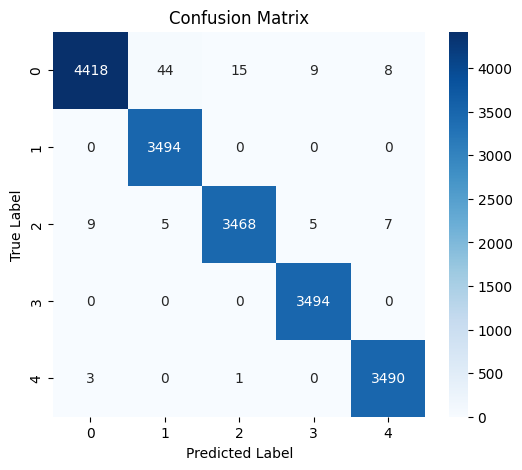

In [49]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[0, 1, 2, 3, 4],
            yticklabels=[0, 1, 2, 3, 4])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()